# Ultimate Bending Capacity - Rectangular Section

## Import modules

In [1]:
from concreteproperties.material import Concrete, SteelBar, SteelStrand
from concreteproperties.stress_strain_profile import (
    ConcreteLinearNoTension,
    RectangularStressBlock,
    SteelElasticPlastic,
    StrandProfile,
)
from sectionproperties.pre.library.primitive_sections import rectangular_section
from concreteproperties.pre import add_bar, add_bar_rectangular_array
from concreteproperties.prestressed_section import PrestressedSection
from concreteproperties.results import MomentCurvatureResults

## Create materials

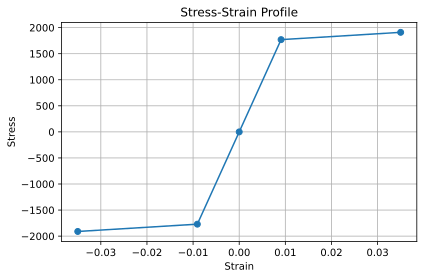

<AxesSubplot: title={'center': 'Stress-Strain Profile'}, xlabel='Strain', ylabel='Stress'>

In [2]:
concrete = Concrete(
    name="40 MPa Concrete",
    density=2.4e-6,
    stress_strain_profile=ConcreteLinearNoTension(
        elastic_modulus=32.75e3,
        ultimate_strain=0.003,
        compressive_strength=40,
    ),
    ultimate_stress_strain_profile=RectangularStressBlock(
        compressive_strength=40,
        alpha=0.85,
        gamma=0.77,
        ultimate_strain=0.003,
    ),
    flexural_tensile_strength=3.4,
    colour="lightgrey",
)

steel = SteelBar(
    name="500 MPa Steel",
    density=7.85e-6,
    stress_strain_profile=SteelElasticPlastic(
        yield_strength=500,
        elastic_modulus=200e3,
        fracture_strain=0.05,
    ),
    colour="grey",
)

strand = SteelStrand(
    name="1910 MPa Strand",
    density=7.85e-6,
    stress_strain_profile=StrandProfile(
        yield_strength=1770,
        elastic_modulus=195e3,
        fracture_strain=0.035,
        breaking_strength=1910,
    ),
    colour="slategrey",
    prestress_force=1200e3,
)
strand.stress_strain_profile.plot_stress_strain()

## Single Tendon

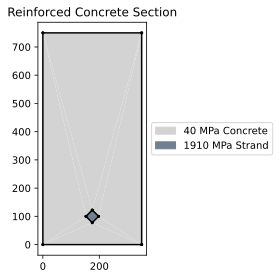

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [3]:
geom = rectangular_section(d=750, b=350, material=concrete)

# add prestressing strand
geom = add_bar(
    geometry=geom,
    area=1000,
    material=strand,
    x=175,
    y=100,
)

conc_sec = PrestressedSection(geometry=geom)
conc_sec.plot_section()

In [4]:
ult_res_1 = conc_sec.ultimate_bending_capacity()
ult_res_1.print_results()
stress_1 = conc_sec.calculate_ultimate_stress(ultimate_results=ult_res_1)

            Ultimate Bending Results            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property                     ┃         Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Bending Angle - theta        │  0.000000e+00 │
│ Neutral Axis Depth - d_n     │  1.955539e+02 │
│ Neutral Axis Parameter - k_u │  3.008522e-01 │
│ Axial Force                  │ -4.018052e+00 │
│ Bending Capacity - m_x       │  1.029805e+09 │
│ Bending Capacity - m_y       │ -3.602670e-08 │
│ Bending Capacity - m_xy      │  1.029805e+09 │
└──────────────────────────────┴───────────────┘

In [8]:
mk_res_1 = conc_sec.moment_curvature_analysis(kappa_mult=1.1)
stress_mk_1 = conc_sec.calculate_service_stress(
    moment_curvature_results=mk_res_1, m=max(mk_res_1.m_x)
)

Output()

## Tendon with Bottom Reinforcement

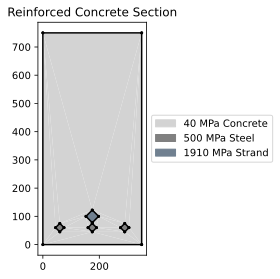

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [9]:
geom = rectangular_section(d=750, b=350, material=concrete)

# add prestressing strand
geom = add_bar(
    geometry=geom,
    area=1000,
    material=strand,
    x=175,
    y=100,
)

# add bottom steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=450, material=steel, n_x=3, x_s=115, anchor=(60, 60)
)

conc_sec = PrestressedSection(geometry=geom)
conc_sec.plot_section()

In [10]:
ult_res_2 = conc_sec.ultimate_bending_capacity()
ult_res_2.print_results()
stress_2 = conc_sec.calculate_ultimate_stress(ultimate_results=ult_res_2)

            Ultimate Bending Results            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property                     ┃         Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Bending Angle - theta        │  0.000000e+00 │
│ Neutral Axis Depth - d_n     │  2.676379e+02 │
│ Neutral Axis Parameter - k_u │  3.878811e-01 │
│ Axial Force                  │  5.899609e+00 │
│ Bending Capacity - m_x       │  1.368343e+09 │
│ Bending Capacity - m_y       │ -2.235174e-08 │
│ Bending Capacity - m_xy      │  1.368343e+09 │
└──────────────────────────────┴───────────────┘

In [11]:
mk_res_2 = conc_sec.moment_curvature_analysis(kappa_mult=1.1)
stress_mk_2 = conc_sec.calculate_service_stress(
    moment_curvature_results=mk_res_2, m=max(mk_res_2.m_x)
)

Output()

## Tendon with Top & Bottom Reinforcement

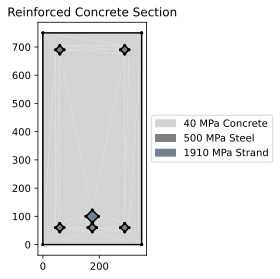

<AxesSubplot: title={'center': 'Reinforced Concrete Section'}>

In [12]:
geom = rectangular_section(d=750, b=350, material=concrete)

# add prestressing strand
geom = add_bar(
    geometry=geom,
    area=1000,
    material=strand,
    x=175,
    y=100,
)

# add bottom steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=450, material=steel, n_x=3, x_s=115, anchor=(60, 60)
)

# add top steel bars
geom = add_bar_rectangular_array(
    geometry=geom, area=450, material=steel, n_x=2, x_s=230, anchor=(60, 750 - 60)
)

conc_sec = PrestressedSection(geometry=geom)
conc_sec.plot_section()

In [13]:
ult_res_3 = conc_sec.ultimate_bending_capacity()
ult_res_3.print_results()
stress_3 = conc_sec.calculate_ultimate_stress(ultimate_results=ult_res_3)

            Ultimate Bending Results            
┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Property                     ┃         Value ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Bending Angle - theta        │  0.000000e+00 │
│ Neutral Axis Depth - d_n     │  2.282740e+02 │
│ Neutral Axis Parameter - k_u │  3.308318e-01 │
│ Axial Force                  │ -6.130051e+00 │
│ Bending Capacity - m_x       │  1.419567e+09 │
│ Bending Capacity - m_y       │ -1.051422e-07 │
│ Bending Capacity - m_xy      │  1.419567e+09 │
└──────────────────────────────┴───────────────┘

In [14]:
mk_res_3 = conc_sec.moment_curvature_analysis(kappa_mult=1.1)
stress_mk_3 = conc_sec.calculate_service_stress(
    moment_curvature_results=mk_res_3, m=max(mk_res_3.m_x)
)

Output()

## Result Comparison

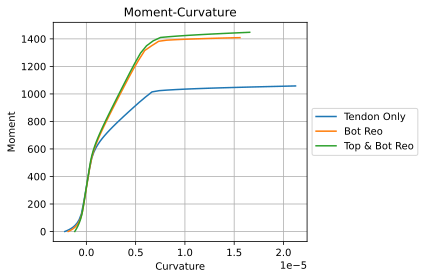

<AxesSubplot: title={'center': 'Moment-Curvature'}, xlabel='Curvature', ylabel='Moment'>

In [15]:
MomentCurvatureResults.plot_multiple_results(
    moment_curvature_results=[mk_res_1, mk_res_2, mk_res_3],
    labels=["Tendon Only", "Bot Reo", "Top & Bot Reo"],
    fmt="-",
)

In [16]:
print(f"Tendon Only Capacity, M_uo = {ult_res_1.m_x / 1e6:.2f} kN.m")
print(f"Tendon Only Moment Curvature, M_uo = {max(mk_res_1.m_x) / 1e6:.2f} kN.m\n")
print(f"Bot Reo Capacity, M_uo = {ult_res_2.m_x / 1e6:.2f} kN.m")
print(f"Bot Reo Moment Curvature, M_uo = {max(mk_res_2.m_x) / 1e6:.2f} kN.m\n")
print(f"Top & Bot Reo Capacity, M_uo = {ult_res_3.m_x / 1e6:.2f} kN.m")
print(f"Top & Bot Reo Moment Curvature, M_uo = {max(mk_res_3.m_x) / 1e6:.2f} kN.m")

Tendon Only Capacity, M_uo = 1029.80 kN.m
Tendon Only Moment Curvature, M_uo = 1057.88 kN.m

Bot Reo Capacity, M_uo = 1368.34 kN.m
Bot Reo Moment Curvature, M_uo = 1409.04 kN.m

Top & Bot Reo Capacity, M_uo = 1419.57 kN.m
Top & Bot Reo Moment Curvature, M_uo = 1447.84 kN.m


## Stress Comparison

### Single Tendon

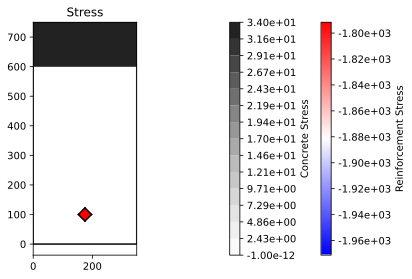

<AxesSubplot: title={'center': 'Stress'}>

In [17]:
stress_1.plot_stress()

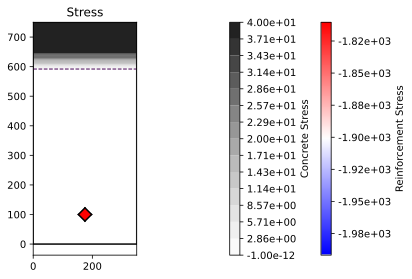

<AxesSubplot: title={'center': 'Stress'}>

In [18]:
stress_mk_1.plot_stress()

### Tendon with Bottom Reinforcement

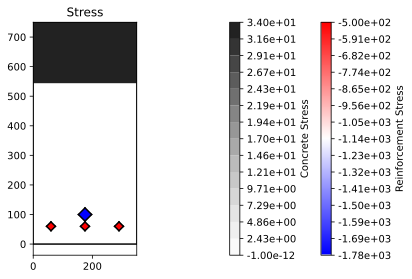

<AxesSubplot: title={'center': 'Stress'}>

In [19]:
stress_2.plot_stress()

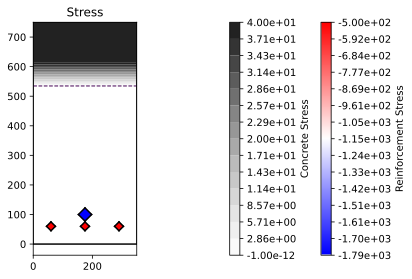

<AxesSubplot: title={'center': 'Stress'}>

In [20]:
stress_mk_2.plot_stress()

### Tendon with Top & Bottom Reinforcement

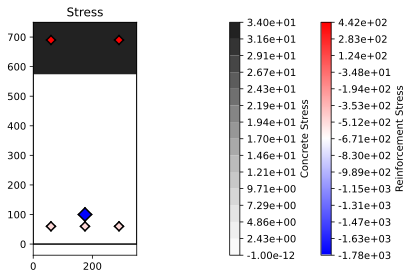

<AxesSubplot: title={'center': 'Stress'}>

In [21]:
stress_3.plot_stress()

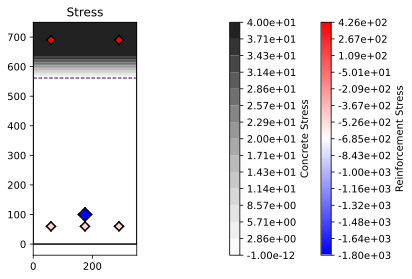

<AxesSubplot: title={'center': 'Stress'}>

In [22]:
stress_mk_3.plot_stress()